# Introduction to PyTorch 

Author: YanSong

Institution: CASIA

E-mail: yan.song@ia.ac.cn



install necessary package

In [1]:
import os
import sys
import random
import numpy as np
import time

CURRENT_PATH = os.getcwd()

## Installing pytorch 下载PyTorch

Pytorch是一个开源的的机器学习框架, [Official site](https://pytorch.org)
1. 使用 pip or conda install
    ```shell
    conda install pytorch

    pip3 install torch
    ```

2. 或者参照官网的下载方式
    ![这是图片](./MacInstall.png "Magic Gardens")

3. 如果有NVIDIA独立显卡，需首先在NVIDIA官网安装适合的CUDA版本





若下载速度较慢，可以给pip添加清华源：
```shell
pip config set global.index-url https://pypi.tuna.tsinghua.edu.cn/simple
```

或者直接

```shell
pip install xxx -i https://pypi.tuna.tsinghua.edu.cn/simple
```

In [4]:
pip install torch


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importing pytoch

In [5]:
import torch
print(torch.__version__)
from torch import nn

1.11.0


## PyTorch数据结构


Tensor(张量)是Pytorch中的基础数据结构，为我们提供了描述具有任意数量轴的$n$维数组的通用方法。例如，向量是一阶张量，矩阵是二阶张量。

Tensor与Numpy相似，但Tensor能在GPU上运行。

张量用特殊字体的大写字母表示，它们的索引机制与矩阵类似。

当我们开始处理图像时，张量将变得更加重要，图像以n维数组形式出现， 其中3个轴对应于高度、宽度，以及一个通道（channel）轴， 用于表示颜色通道（红色、绿色和蓝色）。


![image](./Data_type.png)


### Scalar value

lower-case letters $x\in\mathbb{R}$.

In [6]:
print(torch.empty([]))                              
print(torch.rand([]))                               # Returns a tensor filled with random numbers from a uniform distribution on the interval [0,1)
print(torch.zeros([], dtype=torch.long))            # Returns a tensor filled with the scalar value 0
print(torch.zeros([], dtype=torch.float))
print(torch.tensor(1.337))
print(torch.tensor(1.5).item())                     # Returns the value of this tensor as a standard Python number.



tensor(4.7393e+30)
tensor(0.0857)
tensor(0)
tensor(0.)
tensor(1.3370)
1.5


In [7]:
x = torch.tensor(1.3)
y = torch.tensor(2.7)
print(x+y)              #summation
print(x-y)              #substraction
print(x/y)              #division
print(x*y)              #multiplication
print(x**y)             #exponential

tensor(4.)
tensor(-1.4000)
tensor(0.4815)
tensor(3.5100)
tensor(2.0307)


### Vectors


lowercase bold letters $\mathbf{x}\in\mathbb{R}^n$.

![image](./vectors.png)


In [10]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4,5,6])

print('x = ', x)
print('x + y = ', x+y)
print('2x = ', x*2)
print('x\N{SUPERSCRIPT TWO} = ', x**2)
print('x * y = ', x*y)
print('xᵀy  =', x.dot(y))
print('xyᵀ = ', torch.ger(x,y))


x =  tensor([1, 2, 3])
x + y =  tensor([5, 7, 9])
2x =  tensor([2, 4, 6])
x² =  tensor([1, 4, 9])
x * y =  tensor([ 4, 10, 18])
xᵀy  = tensor(32)
xyᵀ =  tensor([[ 4,  5,  6],
        [ 8, 10, 12],
        [12, 15, 18]])


### Matrices




uppercase bold letters $\mathbf{M}\in\mathbb{R}^{n\ \times\ m}$

![image](./matrices.png)

In [11]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('x = ', x)
print('x + y = ', x+y)
print('x dimension = ', x.dim())
print('x shape = ', x.shape)
print('x * y = ', x*y)
print('xᵀ = ', x.t())

y = torch.tensor([[7, 8, 9], [1, 2, 3]])
print('xyᵀ = ', x.mm(y.t()))

x =  tensor([[1, 2, 3],
        [4, 5, 6]])
x + y =  tensor([[ 5,  7,  9],
        [ 8, 10, 12]])
x dimension =  2
x shape =  torch.Size([2, 3])
x * y =  tensor([[ 4, 10, 18],
        [16, 25, 36]])
xᵀ =  tensor([[1, 4],
        [2, 5],
        [3, 6]])
xyᵀ =  tensor([[ 50,  14],
        [122,  32]])


### Tensors


upper-case Euler script letters: $\mathcal{X}\in \mathbb{R}^{a_1\ \times\ \cdots\  \times\ a_n}$

![image](./tensors1.png)
![image](./tensor2.png)


#### Tensor Initialisation

In [12]:
print(torch.empty(2, 3))                                #uninitialised
print(torch.zeros(2, 3))                                #zero tensor
print(torch.eye(3, 3))                                  #identity tensor
print(torch.full((2, 3), 7, dtype=torch.int16))         #full of entry 7
print(torch.rand(2, 3))                                 #randomly initialised from [0,1]
print(torch.randn(2, 3))                                #randomly initialised from Normal(0,1)
print(torch.randint(low=0, high=10, size=(2, 3)))       #randomly initialised from specified integer set
print(torch.randperm(n=5))                              # random permutation of ints from 0 to n-1

tensor([[ 0.0000e+00,  1.5846e+29,  2.4727e-20],
        [-2.0005e+00,  9.8091e-45,  0.0000e+00]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[7, 7, 7],
        [7, 7, 7]], dtype=torch.int16)
tensor([[0.6738, 0.8698, 0.7385],
        [0.4250, 0.6802, 0.5724]])
tensor([[ 1.0955, -0.5324,  0.3013],
        [-0.4659, -1.0230,  0.0111]])
tensor([[2, 2, 5],
        [7, 8, 5]])
tensor([4, 0, 2, 1, 3])


### NumPy Bridge

**numpy to pytorch**

In [13]:
import numpy as np
n = np.ones(5)
t = torch.from_numpy(n)
print('numpy n = ', n)
print('torch t =', t)
# still pointing to the same memory!  Modification to the tensor will be felected in the array and vice versa.

n += 1
print("\nafter add 1, numpy = ", n)
print('torch = ', t)


numpy n =  [1. 1. 1. 1. 1.]
torch t = tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

after add 1, numpy =  [2. 2. 2. 2. 2.]
torch =  tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [14]:
n = np.ones(5)
t = torch.tensor(n)
print('numpy n = ', n)
print('torch t =', t)
# not now!

n += 1
print("\nafter add 1, numpy = ", n)
print('torch = ', t)


numpy n =  [1. 1. 1. 1. 1.]
torch t = tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

after add 1, numpy =  [2. 2. 2. 2. 2.]
torch =  tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


**pytorch to numpy**

In [15]:
t = torch.ones(5)
n = t.numpy()
print('numpy n = ', n)
print('torch t =', t)
# still pointing to the same memory!

t += 1
print("\nafter add 1, numpy = ", n)
print('torch = ', t)



numpy n =  [1. 1. 1. 1. 1.]
torch t = tensor([1., 1., 1., 1., 1.])

after add 1, numpy =  [2. 2. 2. 2. 2.]
torch =  tensor([2., 2., 2., 2., 2.])


In [16]:
t = torch.ones(5)
n = np.array(t)
print('numpy n = ', n)
print('torch t =', t)
#not now 


t += 1
print("\nafter add 1, numpy = ", n)
print('torch = ', t)




numpy n =  [1. 1. 1. 1. 1.]
torch t = tensor([1., 1., 1., 1., 1.])

after add 1, numpy =  [1. 1. 1. 1. 1.]
torch =  tensor([2., 2., 2., 2., 2.])


## Basic Operations 基础操作

### Summation

In [17]:
x = torch.rand(2, 3, 2)
y = torch.ones(2, 3, 2)
print(f'x = {x}, y = {y}')


x = tensor([[[0.5645, 0.9095],
         [0.2123, 0.6154],
         [0.2475, 0.3778]],

        [[0.1750, 0.3605],
         [0.9338, 0.9977],
         [0.6543, 0.9046]]]), y = tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])


In [90]:
z = torch.add(x, y)
# in-place; no extra memory allocation
x.add_(y) 
# equal up to predefined tolerance
x.allclose(z)

True

In [91]:
print('in_place operation, x = ', x)

in_place operation, x =  tensor([[[1.2109, 1.0734],
         [1.5252, 1.3283],
         [1.2934, 1.4882]],

        [[1.5402, 1.2720],
         [1.3231, 1.4621],
         [1.8985, 1.0239]]])


### Multiplication

In [106]:
x = torch.arange(4, dtype=torch.float32)
y = torch.ones(4, dtype = torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [111]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
torch.mv(A, x), torch.mm(A,A.T)

(tensor([ 14.,  38.,  62.,  86., 110.]),
 tensor([[  14.,   38.,   62.,   86.,  110.],
         [  38.,  126.,  214.,  302.,  390.],
         [  62.,  214.,  366.,  518.,  670.],
         [  86.,  302.,  518.,  734.,  950.],
         [ 110.,  390.,  670.,  950., 1230.]]))

### Tensor Contractions
Generalization of vector-vector, matrix-vector, matrix-matrix product etc.


\begin{align}
\mathcal{X} &\in \mathbb{R}^{a_1\ \times\ \cdots\ \times\ a_{n}\  \times\ b_1\ \times\ b_2}\\
\mathcal{Y} &\in \mathbb{R}^{a_n\ \times\ \cdots\ \times\ a_{n}\ \times\ b_2\ \times\ b_3}\\
\mathcal{Z} &= \mathcal{X} @ \mathcal{Y} \in \mathbb{R}^{a_1\ \times\ \cdots\ \times\ a_{n}\  \times\ b_1 \ \times\ b_3}\\
\mathcal{Z}_{a_1,\cdots,a_n, b_1, b_3} &= \sum_{b_2} \mathcal{X}_{a_1,\cdots,a_n, b_1, b_2} \mathcal{Y}_{a_1,\cdots,a_n, b_2,b_3}
\end{align}

`@` sums over variable n and n-1 unless Y has dimension 1 


In [112]:
x = torch.rand(2, 3, 4, 5)
y = torch.rand(2, 3, 5, 2)
(x @ y).shape

torch.Size([2, 3, 4, 2])

For high-order tensor @ is a batch-matrix multiplication (see einsum for actual tensor contraction).

### Sum, Mean, Max, Min

In [104]:
print(f'x = {x}, shape = {x.shape}')
print('sum of all entries = ', x.sum())
print(f'summing along first dimension = {x.sum(axis=0)}, shape = {x.sum(axis=0).shape}')

print('\nMean of all entries = ', x.mean())
print(f'Mean of the last dimension = {x.mean(axis = -1)} , shape = {x.mean(axis=-1).shape}')

print('\nStd = ', x.std(axis=[0,1]))

print(f'\nKeep dimension = {x.mean(axis=1, keepdim=True).shape}')

x = tensor([[[1.2109, 1.0734],
         [1.5252, 1.3283],
         [1.2934, 1.4882]],

        [[1.5402, 1.2720],
         [1.3231, 1.4621],
         [1.8985, 1.0239]]]), shape = torch.Size([2, 3, 2])
sum of all entries =  tensor(16.4393)
summing along first dimension = tensor([[2.7512, 2.3455],
        [2.8482, 2.7904],
        [3.1919, 2.5121]]), shape = torch.Size([3, 2])

Mean of all entries =  tensor(1.3699)
Mean of the last dimension = tensor([[1.1422, 1.4267, 1.3908],
        [1.4061, 1.3926, 1.4612]]) , shape = torch.Size([2, 3])

Std =  tensor([0.2495, 0.1934])

Keep dimension = torch.Size([2, 1, 2])


In [125]:
x = torch.rand(2,3)
print('x shape = ', x)
print('max = ', x.max())
print(f'max along dim 0, value = {x.max(axis=0)[0]}, indices = {x.max(axis=0)[1]}')

x shape =  tensor([[0.3993, 0.2871, 0.1887],
        [0.7921, 0.6867, 0.8199]])
max =  tensor(0.8199)
max along dim 0, value = tensor([0.7921, 0.6867, 0.8199]), indices = tensor([1, 1, 1])


### Transpose

In [113]:
x = torch.arange(0,6).view(2,3)
x.t()

tensor([[0, 3],
        [1, 4],
        [2, 5]])

Swap specific dimensions with `transpose`

In [114]:
x.t().allclose(x.transpose(0, 1))

True

In [115]:
x.transpose(0, 1).allclose(x.transpose(1, 0))

True

In [119]:
x = torch.arange(0,12).view(2,3,2)
print(f'x shape = {x.shape}, transpose second and third dimension = {x.transpose(1, 2).shape}')

x shape = torch.Size([2, 3, 2]), transpose second and third dimension = torch.Size([2, 2, 3])


### View and Reshape

According to the [document](https://pytorch.org/docs/master/torch.html#torch.reshape), torch.reshape will

`
        returns a tensor with the same data and number of elements as input. When possible, the returned tensor will be a view of input. Otherwise, it will be a copy.
`

It means that .reshape may return a copy or a view of the original tensor and you may not know beforehand.

*view* and *reshape* share API, view does not allocate new memory, reshap also works with non-contiguous tensors but can copy memory. 

**If possible, use *view***

In [126]:
# vector [0, 1, 2, ..., 11]
x = torch.arange(0, 12)
# viewed as a [2 x 3 x 2] tensor
x.view(2, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]])

In [127]:
# viewed as a [3 x 4] matrix
x.view(3, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [128]:
# viewed as a [3 x 2 x 2] tensor via 
# inferring one unspecified dimension!
x.view(-1, 2, 2)

tensor([[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]]])

### Squeeze & Unsqueeze

In [132]:
x = torch.rand(3, 1, 2, 1)
print('Squeeze shape = ', x.squeeze().shape)
print('Unsqueeze shape = ', x.unsqueeze(dim=0).shape)

Squeeze shape =  torch.Size([3, 2])
Unsqueeze shape =  torch.Size([1, 3, 1, 2, 1])


### Expand & Repeat


*expand* and *repeat* share API, repeat allocates new memory while expand does not.

If possible, use expand bu watch out for side effects!

In [139]:
x = torch.arange(0, 3)
x = x.unsqueeze(1)
x

tensor([[0],
        [1],
        [2]])

In [140]:
x = x.expand(-1, 4)
x

tensor([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2]])

In [141]:
x[0,0] = 7
x

tensor([[7, 7, 7, 7],
        [1, 1, 1, 1],
        [2, 2, 2, 2]])

In [142]:
x = torch.arange(0, 3)
x = x.unsqueeze(1)
x = x.repeat(1, 4)
x

tensor([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2]])

In [143]:
x[0,0] = 7
x

tensor([[7, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2]])

### Indexing




![imgae](./index.png)


In [146]:
x = torch.arange(0, 24).view(2, 3, 4)
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [147]:
x[1]

tensor([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]])

In [148]:
x[1,0]

tensor([12, 13, 14, 15])

In [ ]:
x[1,0,3]

In [149]:
x

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [150]:
x[1, 1:, 1:-1]

tensor([[17, 18],
        [21, 22]])

In [151]:
indices = torch.tensor([0, 0, 2, 1])
x[:, indices]

tensor([[[ 0,  1,  2,  3],
         [ 0,  1,  2,  3],
         [ 8,  9, 10, 11],
         [ 4,  5,  6,  7]],

        [[12, 13, 14, 15],
         [12, 13, 14, 15],
         [20, 21, 22, 23],
         [16, 17, 18, 19]]])

### Cat and Stack

In [9]:
x = torch.arange(0, 6).view(3, 2)
torch.cat([x, x], dim=0)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [0, 1],
        [2, 3],
        [4, 5]])

In [11]:
x = torch.arange(0, 6).view(2, 3)
y = torch.arange(6, 12).view(2, 3)
torch.stack([x, y, x]).shape

torch.Size([3, 2, 3])

### Gather



(from StackOverflow)
![alt text](https://drive.google.com/uc?export=view&id=1c-GmsmE3qMwr5oFiI8EqfLvW4GzPwbhx)

In [12]:
x = torch.tensor([[1, 2],
                  [3, 4]])
index = torch.tensor([[0, 0],
                      [1, 0]])
torch.gather(x, 1, index)

tensor([[1, 1],
        [4, 3]])

In [13]:
x = torch.tensor([[1, 2],
                  [3, 4]])
index = torch.tensor([[0, 0],
                      [1, 0]])
torch.gather(x, 0, index)

tensor([[1, 2],
        [3, 2]])

In [14]:
x = torch.arange(0, 8).view(2, 2, 2)
index = torch.tensor([
  [[0, 1], [1, 0]], 
  [[0, 0], [1, 0]]
])
torch.gather(x, 1, index)

tensor([[[0, 3],
         [2, 1]],

        [[4, 5],
         [6, 5]]])

### Broadcasting
Often you can make two tensors compatible for operations via views/unsqueeze and expand functions. In such cases, broadcasting does this for you, automatically.  

In [ ]:
x = torch.arange(0, 6).view(2, 3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [ ]:
y = torch.tensor([2,3])
y

tensor([2, 3])

In [ ]:
y = y.view(2,1)
y

tensor([[2],
        [3]])

In [ ]:
y = y.repeat([1,3])
y

tensor([[2, 2, 2],
        [3, 3, 3]])

In [ ]:
x * y

tensor([[ 0,  2,  4],
        [ 9, 12, 15]])


Two tensors are “broadcastable” if both tensors have no empty dimensions and when iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [19]:
x = torch.arange(0, 6).view(3, 2)
y = torch.tensor([[2,3]])
print(x.shape, y.shape)
# x.shape, y.shape
print(x, y)
x * y


torch.Size([3, 2]) torch.Size([1, 2])
tensor([[0, 1],
        [2, 3],
        [4, 5]]) tensor([[2, 3]])


tensor([[ 0,  3],
        [ 4,  9],
        [ 8, 15]])

In [ ]:
x = torch.empty(3, 5, 7, 9)
y = torch.empty(3, 5, 7, 9)
# same shapes are always broadcastable

In [22]:
x = torch.empty((0,))
y = torch.empty(2, 2)
# x and y are not broadcastable
# x does not have at least one dimension
x.shape


torch.Size([0])

In [24]:
x = torch.empty(5, 3, 4, 1)
y = torch.empty(   3, 1, 1)
# x and y are broadcastable
# 1st trailing dimension: both have size 1
# 2nd trailing dimension: y has size 1
# 3rd trailing dimension: x size == y size
# 4th trailing dimension: y dim doesn't exist


In [18]:
x = torch.empty(5, 2, 4, 1)
y = torch.empty(   3, 1, 1)
# x and y are not broadcastable
# in the 3rd trailing dimension 2 != 3


In [19]:
x = torch.empty(5, 3, 4, 1)
y = torch.empty(3,1)
(x*y).shape

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 2

### Sparse Tensors

In [152]:
indices = torch.LongTensor([[2, 4, 7], 
                            [3, 2, 1]])
values = torch.FloatTensor([3, 4, 5])
# sparse
x = torch.sparse.FloatTensor(
  indices, values, torch.Size([10, 100000000]))
# dense
m = torch.rand(100000000, 1)
torch.sparse.mm(x, m)

tensor([[0.0000],
        [0.0000],
        [1.9139],
        [0.0000],
        [3.0439],
        [0.0000],
        [0.0000],
        [1.5192],
        [0.0000],
        [0.0000]])

In [153]:
indices = torch.LongTensor([[2, 4, 7], 
                            [3, 2, 1]])
values = torch.FloatTensor([3, 4, 5])
# sparse
sparse_x = torch.sparse.FloatTensor(
  indices, values, torch.Size([10, 100000000]))
# dense
dense_x = torch.zeros(10, 100000000)
dense_x[2, 3] = 3
dense_x[4, 2] = 4
dense_x[7, 1] = 5
# dense
m = torch.rand(100000000, 1)

In [154]:
%%timeit
torch.mm(dense_x, m)

501 ms ± 243 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [155]:
%%timeit
torch.sparse.mm(sparse_x, m)

5.23 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Variables  变量

In [160]:
# variable
x = torch.tensor([-1.5, 1.2], requires_grad=True)
# constant
y = torch.tensor([1.0, -1.3])
# variable
z = torch.tensor([-2.0, 0.2], requires_grad=True)
# output tensor value, but also computation graph
ret = x * y @ z

print('results = ', ret)
print('data = ', ret.data)
print('gradient function = ', ret.grad_fn)


results =  tensor(2.6880, grad_fn=<DotBackward0>)
data =  tensor(2.6880)
gradient function =  <DotBackward0 object at 0x112b49df0>


In [165]:

pip install torchviz

9953.21s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


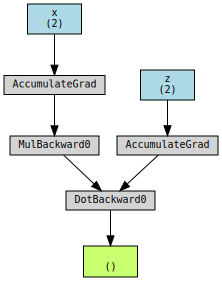

In [166]:
from torchviz import make_dot
make_dot(x * y @ z, {"x":x, "z":z})


## Gradients  梯度

In [164]:
x = torch.tensor([-1.5, 1.2], requires_grad=True)
y = torch.tensor([1.0, -1.3])
z = torch.tensor([-2.0, 0.2], requires_grad=True)
r = x * y @ z
r.backward()
x.grad

tensor([-2.0000, -0.2600])

In [167]:

a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
c = torch.rand(1, requires_grad=True)
d = torch.rand(1, requires_grad=True)
e = a*b
f = c*e + d*e
f

tensor([0.1664], grad_fn=<AddBackward0>)

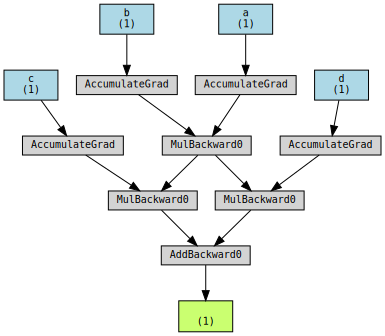

In [168]:
make_dot(f, {"a":a, "b":b, "c": c, "d": d})

### Pytorch Autograd Function

In [4]:
from os import stat
from torch.autograd import Function

class MyExp(Function):
    @staticmethod
    def forward(ctx, i):
        result = i.exp()
        ctx.save_for_backward(result)
        return result
    
    @staticmethod
    def backward(ctx, grad_output):
        result, = ctx.saved_tensors
        return grad_output * result

x = torch.tensor([0.5], requires_grad=True)
y = MyExp.apply(x)
y.backward()
x.grad



tensor([1.6487])

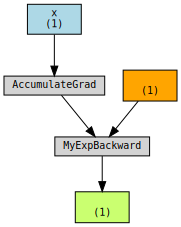

In [6]:
from torchviz import make_dot
x = torch.tensor([0.5], requires_grad=True)
y = MyExp.apply(x)
make_dot(y, {"x":x})

## Customised Linear Model Example   手写线性模型

In [5]:
class LinearModule(torch.nn.Module):
    def __init__(self, x_dim, y_dim):
        super(LinearModule, self).__init__()
        self.W = nn.Parameter(torch.randn(y_dim, x_dim, requires_grad=True))
        self.b = nn.Parameter(torch.randn(y_dim), requires_grad=True)
    def forward(self, x):
        return self.W @ x + self.b

# Some random input and output data
x = torch.randn(5)
y = torch.randn(2)

model = LinearModule(5, 2)

for param in model.parameters():
    print(param.size())

pred = model(x)
pred

torch.Size([2, 5])
torch.Size([2])


tensor([2.2841, 7.7850], grad_fn=<AddBackward0>)

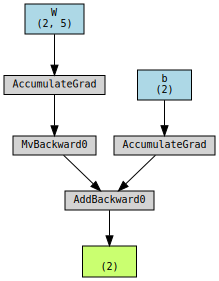

In [6]:
from torchviz import make_dot
make_dot(pred, { 'W': model.W, 'b': model.b})

In [10]:
class TwoLinearModule(torch.nn.Module):
    def __init__(self, x_dim, y_dim, h_dim):
        super(TwoLinearModule, self).__init__()
        self.W1 = nn.Parameter(torch.randn(h_dim, x_dim, requires_grad=True))
        self.b1 = nn.Parameter(torch.randn(h_dim))

        self.W2 = nn.Parameter(torch.randn(y_dim, h_dim, requires_grad=True))
        self.b2 = nn.Parameter(torch.randn(y_dim))

    def forward(self, x):
        tmp = self.W1 @ x + self.b1
        tmp = torch.sigmoid(tmp)            #activation function
        return self.W2 @ tmp + self.b2

x = torch.randn(5)
y = torch.randn(2)

model = TwoLinearModule(5, 2, 4)

for param in model.parameters():
    print(param.size())

pred = model(x)
pred


torch.Size([4, 5])
torch.Size([4])
torch.Size([2, 4])
torch.Size([2])


tensor([-0.0627,  2.6049], grad_fn=<AddBackward0>)

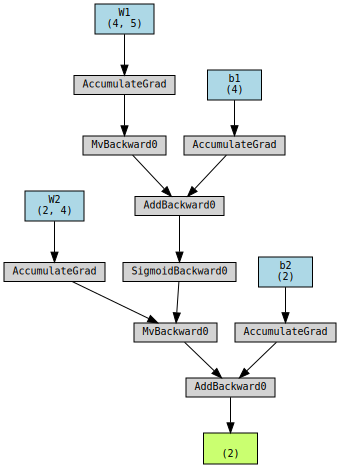

In [11]:
make_dot(pred, { 'W1': model.W1, 'b1': model.b1, 'W2': model.W2, 'b2': model.b2})

## Don't want to build your model from scratch?  Pytorch模型

In [27]:
LinearModel = torch.nn.Linear(2,5)
W_copy = LinearModel.weight.clone().detach()

optimiser = torch.optim.SGD(LinearModel.parameters(), lr = 0.1, momentum=0.9)
optimiser.zero_grad()       #clear the gradient first
loss_fn = torch.nn.MSELoss()

input = torch.randn(3, 2, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
pred = LinearModel(input)

loss = loss_fn(pred, target)
loss.backward()

optimiser.step()

W_new_copy = LinearModel.weight.clone().detach()

print('Difference in W = ', W_new_copy-W_copy)




Difference in W =  tensor([[ 0.0061,  0.0167],
        [ 0.0170,  0.0040],
        [-0.0014,  0.0038],
        [ 0.0054,  0.0085],
        [-0.0012,  0.0112]])


or use nn.Sequential

In [6]:
Net = nn.Sequential(
    nn.Linear(2,10),
    nn.ReLU(),
    nn.Linear(10, 5)
)
optimiser = torch.optim.SGD(Net.parameters(), lr = 0.1, momentum=0.9)
optimiser.zero_grad()       #clear the gradient first
loss_fn = torch.nn.MSELoss()
loss.backward()

optimiser.step()

NameError: name 'nn' is not defined

## Some useful tools 一些工具

#### DataLoader

导入库

In [1]:
import torch
import torch.utils.data as Data

生成数据并包装为dataset

In [2]:
#生成1,2,3,4,5,6,7,8,9,10
x = torch.linspace(1, 10, 10)
#生成10,9,8,7,6,5,4,3,2,1
y = torch.linspace(10, 1, 10)
# 对于给定的tensor数据（样本和标签），将其包装为dataset
torch_dataset = Data.TensorDataset(x, y)

创建一个dataloader类的实例

In [3]:

loader = Data.DataLoader(
    # 从数据库中每次抽出batch size个样本
    dataset=torch_dataset,
    batch_size=5,
    shuffle=True,
    num_workers=2,
)

重复多次显示一个batch的数据

In [4]:
def show_batch():
    for epoch in range(3):
        for step, (batch_x, batch_y) in enumerate(loader):
            # training


            print("step:{}, batch_x:{}, batch_y:{}".format(step, batch_x, batch_y))

show_batch()


step:0, batch_x:tensor([ 3.,  7.,  2., 10.,  4.]), batch_y:tensor([8., 4., 9., 1., 7.])
step:1, batch_x:tensor([9., 5., 1., 8., 6.]), batch_y:tensor([ 2.,  6., 10.,  3.,  5.])
step:0, batch_x:tensor([6., 4., 7., 1., 3.]), batch_y:tensor([ 5.,  7.,  4., 10.,  8.])
step:1, batch_x:tensor([ 8., 10.,  5.,  9.,  2.]), batch_y:tensor([3., 1., 6., 2., 9.])
step:0, batch_x:tensor([1., 3., 9., 2., 8.]), batch_y:tensor([10.,  8.,  2.,  9.,  3.])
step:1, batch_x:tensor([ 7.,  6.,  5., 10.,  4.]), batch_y:tensor([4., 5., 6., 1., 7.])


#### Tensorboard

一般来说，直接pip安装即可

```shell
pip install tensorboard
```

Tensorboard的工作流程简单来说是

* 将代码运行过程中的，某些你关心的数据保存在一个文件夹中：

        这一步由代码中的writer完成
* 再读取这个文件夹中的数据，用浏览器显示出来：

        这一步通过在命令行运行tensorboard完成。

In [ ]:
#首先带入库
from torch.utils.tensorboard import SummaryWriter  

#........#

#讲其实例化
writer = SummaryWriter('./path/to/log')

这里传入的参数就是指向文件夹的路径，之后我们使用这个writer对象“拿出来”的任何数据都保存在这个路径之下。

这个对象包含多个方法，比如针对数值，我们可以调用

writer.add_scalar(tag, scalar_value, global_step=None, walltime=None)

这里的**tag**指定可视化时这个变量的名字，**scalar_value**是你要存的值，**global_step**可以理解为x轴坐标。

**可视化:**

我们已经将关心的数据拿出来了，接下来我们只需要在**命令行**运行：


```shell
tensorboard --logdir=./path/to/the/folder --port 8123
```

这里的8123只是随便一个例子，用其他的未被占用端口也没有任何问题，注意命令行的端口与浏览器访问的地址同步。

**细节:**

1. 这样命名，3个loss就会被显示在同一个section

In [ ]:
writer.add_scalar('loss/loss1', loss1, epoch)
writer.add_scalar('loss/loss2', loss2, epoch)
writer.add_scalar('loss/loss3', loss3, epoch)

#### Save and load models

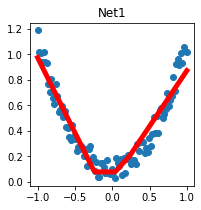

In [7]:
import torch
import matplotlib.pyplot as plt
# fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# save net1
net1 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

for t in range(100):
    prediction = net1(x)
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# plot result
plt.figure(1, figsize=(10, 3))
plt.subplot(131)
plt.title('Net1')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

**两种方式保存模型**：

* 只保存网络中的参数
* 保存整个网络

In [8]:
# 2 ways to save the net
torch.save(net1, 'net.pkl')  # save entire net
torch.save(net1.state_dict(), 'net_params.pkl')   # save only the parameters

**加载模型**

1. 直接加载整个模型

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


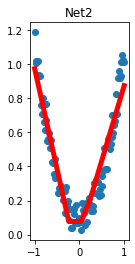

In [12]:
net2 = torch.load('net.pkl')
print(net2)
prediction = net2(x)

# plot result
plt.subplot(132)
plt.title('Net2')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5);


In [10]:
net2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

2. 新建相同大小的网络，再加载参数

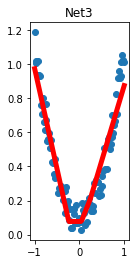

In [13]:
net3 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

# copy net1's parameters into net3
net3.load_state_dict(torch.load('net_params.pkl'))
prediction = net3(x)

# plot result
plt.subplot(133)
plt.title('Net3')
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
plt.show()

## Training Loop Scaffold


In [ ]:
x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)
torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    # 从数据库中每次抽出batch size个样本
    dataset=torch_dataset,
    batch_size=5,
    shuffle=True,
    num_workers=2,
)

# save net1
net1 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)
optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()        #tb log path

update_epoch = 0

for i in range(10):
    for sample_X, sample_Y in loader:
        pred_Y = net1(sample_X)

        loss = loss_func(pred_Y, sample_Y)
        loss.backward()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        update_epoch += 1
        writer.add_scalar("loss", loss.item(), update_epoch)

    while (i+1) % 5 == 0:
        torch.save(net1.state_dict())
    

    while (i+1)%2 == 0:
        #evaluation ....




## Hands-on tasks 实战 (详情见Pytorch入门3)

## Homework: A Behaviour Cloning Example and Jidi  作业：BC决策案例

install environment


![imgae](./AI-olympics.png)


In [2]:
!git clone https://github.com/jidiai/olympics_engine.git

Cloning into 'olympics_engine'...
remote: Enumerating objects: 705, done.
remote: Counting objects: 100% (317/317), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 705 (delta 161), reused 231 (delta 89), pack-reused 388
Receiving objects: 100% (705/705), 4.93 MiB | 2.29 MiB/s, done.
Resolving deltas: 100% (411/411), done.


install environment on path where the repo is located in

In [14]:
ls

111.gif               Pytorch入门3.ipynb    path/
AI-Olympics.png       RNN.png               ppt/
ComputeGraph.png      SGD.png               pytorch_intro.ipynb
Data_type.png         WindowsInstall.png    pytorch_yan.ipynb
MNIST1.png            data/                 scalar_grad.png
MNIST2.png            index.png             tensor2.png
MNIST3.png            matrices.png          tensors1.png
MacInstall.png        net.pkl               torch_variable.png
Pytorch入门1.ipynb    net_params.pkl        vectors.png
Pytorch入门2.ipynb    olympics_engine/      yan/


In [15]:
pip install olympics_engine/.

Processing ./olympics_engine
  Preparing metadata (setup.py) ... done
  Created wheel for olympics-engine: filename=olympics_engine-0.1.0-py3-none-any.whl size=25110 sha256=1058c7ebaed4731adac97f27fd88db48df4fcbf4f03a876e7a5e2f3490d1dba9
  Stored in directory: /private/var/folders/0t/w0ff24cs6v76t0jn13gpq83w0000gn/T/pip-ephem-wheel-cache-da93rt2l/wheels/17/db/49/97b44acb71f43596e0687a179a27582c6165569ec9b7824fd6
Successfully built olympics-engine

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


then we haved install the wrestling environment, lets have a try!

In [16]:
pip show olympics_engine

Name: olympics-engine
Version: 0.1.0
Summary: A multi-agent benchmark
Home-page: https://github.com/jidiai/olympics_engine
Author: Yan Song
Author-email: yan.song@ia.ac.cn
License: MIT
Location: /Users/yansong/Desktop/neurips benchmark track/code/exp-venv/lib/python3.9/site-packages
Requires: gym, numpy, pygame
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [17]:
from olympics_engine.scenario import wrestling
from olympics_engine.generator import create_scenario

gamemap =  create_scenario('wrestling')        #load map config
game = wrestling(gamemap)


[{'agent_obs': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'id': 'team_0'}, {'agent_obs': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'id': 'team_1'}]


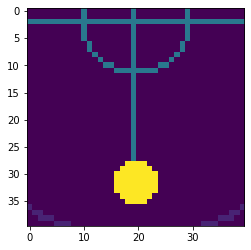

In [18]:
obs = game.reset()
print(obs)

import matplotlib.pyplot as plt

plt.imshow(obs[0]['agent_obs']);            #what does the observation looks like

Try to run it

In [19]:
import random
import pygame


print('action dim 0 range = ',game.action_f)
print('action dim 1 range = ', game.action_theta)
our_team = 0        #we control team_0
obs = game.reset()
done = False
RENDER = False
if RENDER:
    game.render()

while not done:
    action_team_0 = [random.uniform(-100,200), random.uniform(-30, 30)]     #for now we use random actions for both teams
    action_team_1 = [random.uniform(-100,200), random.uniform(-30, 30)]
    
    if our_team:
        input_action = [action_team_1, action_team_0]
    else:
        input_action = [action_team_0, action_team_1]


    next_obs, reward, done, _ = game.step(input_action)
    if RENDER:
        game.render()
    
    obs = next_obs
print('final reward = ', reward)
pygame.display.quit()
pygame.quit()



action dim 0 range =  [-100, 200]
action dim 1 range =  [-30, 30]
final reward =  [0.0, 1]


We have provided some demonstration data, including the obesrvation and the corresponding action from an expert policy. Now our job is to mimick this beahviour by supervised learning.

In [20]:
#load data
import numpy as np

data_path = os.path.join(CURRENT_PATH, 'data/wrestling')
demo_obs = np.load(os.path.join(data_path, 'obs_10000.npy'))
demo_actions = np.load(os.path.join(data_path, 'actions_10000.npy'))

print(f'obs shape = {demo_obs.shape}, action shape = {demo_actions.shape}')     

obs shape = (10000, 40, 40), action shape = (10000, 2)


In [ ]:
# data preprocessing ,using DataLoader maybe?






In [ ]:
#TODO: setup models 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

    def forward(self, X):
        #TODO

        return 

In [ ]:
#Training loop






## Jidi 及第平台

提交例子 /submission_example/submission

In [21]:
ls

111.gif               RNN.png               pytorch_intro.ipynb
AI-Olympics.png       SGD.png               pytorch_yan.ipynb
ComputeGraph.png      WindowsInstall.png    scalar_grad.png
Data_type.png         data/                 submission_example/
MNIST1.png            index.png             tensor2.png
MNIST2.png            matrices.png          tensors1.png
MNIST3.png            net.pkl               torch_variable.png
MacInstall.png        net_params.pkl        vectors.png
Pytorch入门1.ipynb    olympics_engine/      yan/
Pytorch入门2.ipynb    path/
Pytorch入门3.ipynb    ppt/


In [25]:
!python submission_example/submission.py